# Image Processing: Filtering

In [126]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [114]:
# load image
FILENAME = "image.png"
img = cv2.imread(FILENAME, cv2.IMREAD_GRAYSCALE)
print(img.shape)

(4032, 3024)


## Filtering in Frequency Domain

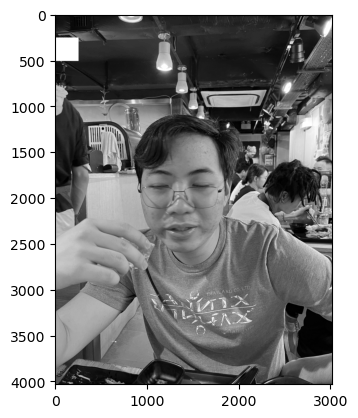

In [115]:
img[256:512, 0:256] = 255
plt.imshow(img, cmap = "gray")

In [134]:
def create_lines(height, img_height = 4032, img_width = 3024):
    # create multiple lines
    alternate = True
    output = np.zeros((img_height, img_width, 3), dtype = np.uint8)
    for i in range(0, img_height, height):
        if alternate:
            output[i:i + height, :, :] = 255
        alternate = not alternate

    return output

def create_grid(length, img_height = 4032, img_width = 3024):
    # create a grid
    alternate_col = True
    output = np.zeros((img_height, img_width, 3), dtype = np.uint8)
    for i in range(0, img_height, length):
        for j in range(0, img_width, length):
            if alternate_col:
                output[i:i + length, j:j + length, :] = 255
            alternate_col = not alternate_col

    return output

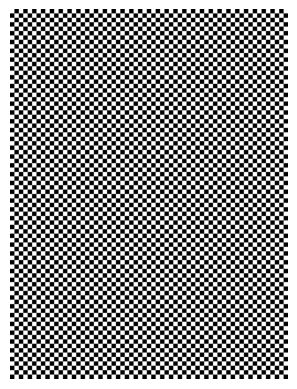

In [135]:
grid = create_grid(48)
plt.imshow(grid, cmap = "gray")
plt.axis("off")
plt.show()


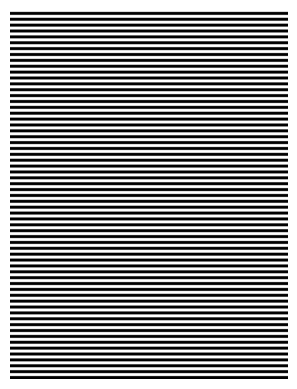

In [94]:
lines = create_lines(32, img.shape[0], img.shape[1])

plt.imshow(lines, cmap = "gray")
plt.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


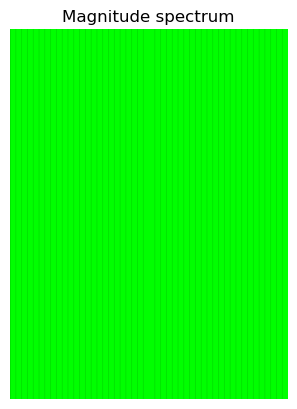

In [125]:
# apply Fourier transform
f = np.fft.fft2(grid)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1 + np.abs(fshift))

plt.imshow(magnitude_spectrum, cmap = "gray")
plt.title("Magnitude spectrum")
plt.axis("off")
plt.show()